Alle Module erfolgreich importiert!

Erfolgreich die Ergebnisdatei geladen: team_model_summary.csv
Hier sind die ersten paar Zeilen, um die Spaltennamen zu sehen:
      member   model_name                                            encoder  \
0  Charlotte  NN_embedded  OneHotEncoder and Embeddings for large categories   

           split_path              feature_recipe  seed  cv_folds  hold_auc  \
0  split_indices.json  selected_from_feature_gate    42         5  0.637692   

    hold_ap  hold_brier  cv_auc_mean  cv_ap_mean  early_stopping  \
0  0.066271    0.034889     0.625371    0.061557            True   

   best_iteration         n_trees  fit_time_s  predict_time_ms_per_1k  \
0               3  (10, 'Epochs')  1612.54143                795.5233   

   params_json  
0          NaN  

--- FINALER MODELLVERGLEICH ---
    model_name  cv_auc_mean      Gini
0  NN_embedded     0.625371  0.250741


/var/folders/l7/lc9qtj7n55ld2xmzzjjmrzq00000gn/T/ipykernel_14382/1353755754.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


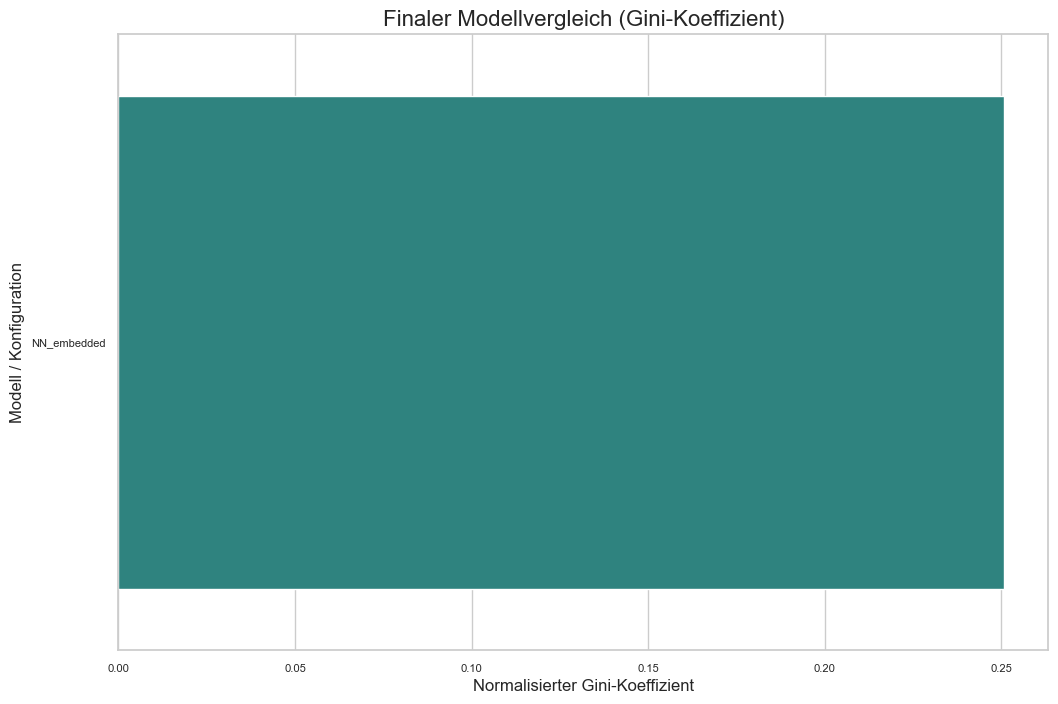

In [11]:
# === SETUP (bleibt gleich) ===
import sys
from pathlib import Path

project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))


# === IMPORTS (bleiben gleich) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src import theme
theme.set_project_theme()

print("Alle Module erfolgreich importiert!")


# === HAUPT-ERGEBNISDATEI LADEN ===
REPORTS_DIR = project_root / 'reports'
# Wir konzentrieren uns auf die vielversprechendste Datei
summary_file = REPORTS_DIR / 'team_model_summary.csv' 
# Alternativ: summary_file = REPORTS_DIR / 'feature_gate_scores.csv'

try:
    all_results_df = pd.read_csv(summary_file)
    print(f"\nErfolgreich die Ergebnisdatei geladen: {summary_file.name}")
    print("Hier sind die ersten paar Zeilen, um die Spaltennamen zu sehen:")
    print(all_results_df.head())

except FileNotFoundError:
    print(f"\nFEHLER: Konnte die Ergebnisdatei '{summary_file.name}' nicht finden.")
    all_results_df = pd.DataFrame() # Erstelle einen leeren DataFrame, um Fehler zu vermeiden


# === MODELLVERGLEICH (JETZT VIEL EINFACHER) ===
if not all_results_df.empty:
    
    # ANNAHME: Die Datei enthält eine Spalte mit einer AUC-Metrik.
    # Passe 'cv_auc' an den tatsächlichen Spaltennamen in deiner Datei an!
    # Mögliche Namen: 'cv_auc', 'ROC_AUC', 'AUC', 'holdout_auc'
    auc_column_name = 'cv_auc_mean' # <-- KORRIGIERT!
    model_column_name = 'model_name' # <-- Dieser war schon richtig.

    if auc_column_name not in all_results_df.columns:
        print(f"\nFEHLER: Die Spalte '{auc_column_name}' wurde in der CSV-Datei nicht gefunden.")
        print(f"Verfügbare Spalten sind: {list(all_results_df.columns)}")
    else:
        # Berechne den Gini-Koeffizienten
        all_results_df['Gini'] = 2 * all_results_df[auc_column_name] - 1

        # Sortiere nach der besten Leistung
        final_results = all_results_df.sort_values(by='Gini', ascending=False)

        print("\n--- FINALER MODELLVERGLEICH ---")
        print(final_results[[model_column_name, auc_column_name, 'Gini']])

        # === VISUALISIERUNG ===
        plt.figure(figsize=(12, 8))
        sns.barplot(
            x='Gini', 
            y=model_column_name, 
            data=final_results, 
            palette='viridis'
        )
        plt.title('Finaler Modellvergleich (Gini-Koeffizient)', fontsize=16)
        plt.xlabel('Normalisierter Gini-Koeffizient')
        plt.ylabel('Modell / Konfiguration')
        plt.show()
else:
    print("\nKonnte keine Ergebnisse laden, um sie zu vergleichen.")

In [12]:
import pandas as pd
from pathlib import Path
import os

# Wir definieren wieder den Pfad zum reports-Verzeichnis
project_root = Path.cwd().parent
REPORTS_DIR = project_root / 'reports'

print(f"--- Durchsuche alle CSV-Dateien in: {REPORTS_DIR} ---\n")

# Finde alle CSV-Dateien in allen Unterordnern
csv_files = list(REPORTS_DIR.glob('**/*.csv'))

if not csv_files:
    print("Keine CSV-Dateien in den 'reports'-Unterordnern gefunden.")
else:
    # Gehe durch jede gefundene CSV-Datei
    for file_path in csv_files:
        try:
            # Lese nur die erste Zeile (Header) ein, um die Spalten zu sehen
            header_df = pd.read_csv(file_path, nrows=0)
            columns = list(header_df.columns)
            
            # Gib den Pfad und die gefundenen Spalten aus
            # os.path.relpath macht den Pfad kürzer und lesbarer
            relative_path = os.path.relpath(file_path, project_root)
            print(f"Datei: {relative_path}")
            print(f"Spalten: {columns}\n")
            
        except Exception as e:
            # Falls eine Datei leer ist oder ein Problem hat
            relative_path = os.path.relpath(file_path, project_root)
            print(f"Datei: {relative_path}")
            print(f"Konnte Spalten nicht lesen. Fehler: {e}\n")

--- Durchsuche alle CSV-Dateien in: /Users/lucasbeseler/ada_portoSeguro/reports ---

Datei: reports/feature_gate_scores.csv
Spalten: ['name', 'n_features', 'cv_auc', 'cv_pr_auc', 'drop_calc', 'extra_drop', 'add_extras', 'te_cat']

Datei: reports/feature_ablation_results.csv
Spalten: ['feature', 'action', 'n_features_variant', 'auc_base_mean', 'auc_variant_mean', 'delta_auc_mean', 'delta_auc_ci_low', 'delta_auc_ci_high', 'seeds', 'cv', 'abs_delta']

Datei: reports/team_model_summary.csv
Spalten: ['member', 'model_name', 'encoder', 'split_path', 'feature_recipe', 'seed', 'cv_folds', 'hold_auc', 'hold_ap', 'hold_brier', 'cv_auc_mean', 'cv_ap_mean', 'early_stopping', 'best_iteration', 'n_trees', 'fit_time_s', 'predict_time_ms_per_1k', 'params_json']

Datei: reports/feature_ablation_decisions.csv
Spalten: ['feature', 'action', 'n_features_variant', 'auc_base_mean', 'auc_variant_mean', 'delta_auc_mean', 'delta_auc_ci_low', 'delta_auc_ci_high', 'seeds', 'cv', 'abs_delta', 'decision']

Datei: 

Alle Module erfolgreich importiert!

Erfolgreich die Ergebnisdatei geladen: feature_gate_scores.csv

--- VOLLSTÄNDIGER MODELLVERGLEICH ---
             model_name    cv_auc      Gini  n_features
0  drop_calc+opt+extras  0.618422  0.236845          37
1      drop_calc+extras  0.618302  0.236604          39
2        drop_calc_only  0.618155  0.236310          37
3          all_features  0.616991  0.233982          57


/var/folders/l7/lc9qtj7n55ld2xmzzjjmrzq00000gn/T/ipykernel_14382/2853316253.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


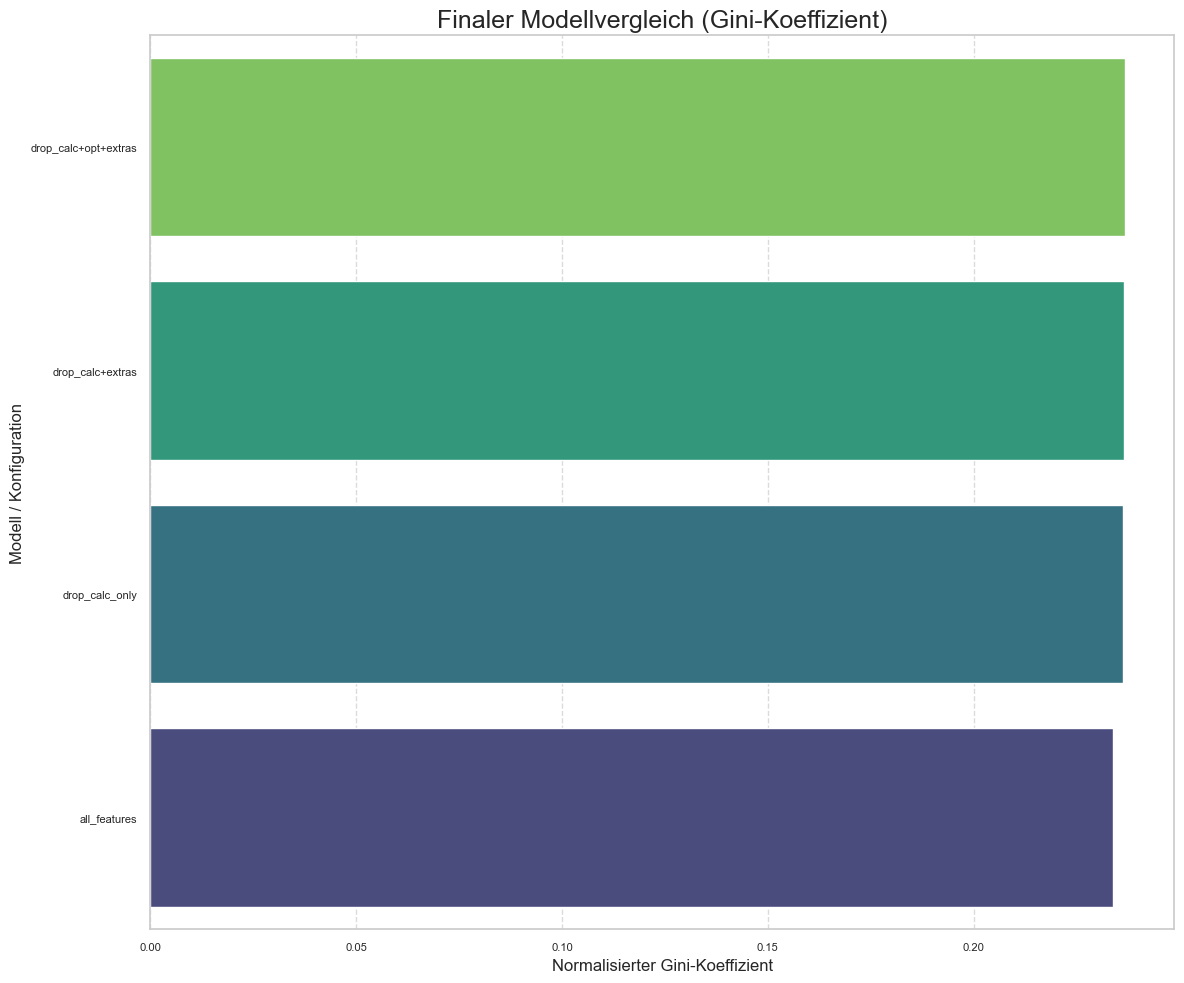

In [13]:
# === SETUP (bleibt gleich) ===
import sys
from pathlib import Path

project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))


# === IMPORTS (bleiben gleich) ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src import theme
theme.set_project_theme()

print("Alle Module erfolgreich importiert!")


# === HAUPT-ERGEBNISDATEI LADEN (Die "Goldgrube") ===
REPORTS_DIR = project_root / 'reports'
results_file = REPORTS_DIR / 'feature_gate_scores.csv'

try:
    all_results_df = pd.read_csv(results_file)
    print(f"\nErfolgreich die Ergebnisdatei geladen: {results_file.name}")
    # Der Spaltenname für das Modell ist in dieser Datei anscheinend 'name'
    # Wir benennen ihn um, damit es klarer ist
    all_results_df = all_results_df.rename(columns={'name': 'model_name'})

except FileNotFoundError:
    print(f"\nFEHLER: Konnte die Datei '{results_file.name}' nicht finden.")
    all_results_df = pd.DataFrame()


# === MODELLVERGLEICH AUF BASIS DER GELADENEN DATEN ===
if not all_results_df.empty:
    
    # Die relevante Spalte für die Performance ist 'cv_auc'
    auc_column_name = 'cv_auc'

    # Berechne den Gini-Koeffizienten für alle Modelle
    all_results_df['Gini'] = 2 * all_results_df[auc_column_name] - 1

    # Sortiere alle Modelle nach ihrer Leistung
    sorted_results = all_results_df.sort_values(by='Gini', ascending=False)

    print("\n--- VOLLSTÄNDIGER MODELLVERGLEICH ---")
    # Zeigen wir die wichtigsten Spalten an
    print(sorted_results[['model_name', auc_column_name, 'Gini', 'n_features']])

    # === VISUALISIERUNG ===
    plt.figure(figsize=(12, 10))
    sns.barplot(
        x='Gini', 
        y='model_name', 
        data=sorted_results, 
        palette='viridis_r' # _r kehrt die Farbpalette um (besser = dunkler)
    )
    plt.title('Finaler Modellvergleich (Gini-Koeffizient)', fontsize=18)
    plt.xlabel('Normalisierter Gini-Koeffizient', fontsize=12)
    plt.ylabel('Modell / Konfiguration', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout() # Stellt sicher, dass die Achsenbeschriftungen nicht abgeschnitten werden
    plt.show()
else:
    print("\nKonnte keine Ergebnisse laden, um sie zu vergleichen.")

In [14]:
# === SETUP & IMPORTS (bleiben gleich) ===
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from src import theme
theme.set_project_theme()

print("Alle Module erfolgreich importiert!")


# === DATEN SAMMELN: Wir laden aus allen verfügbaren Quellen ===
REPORTS_DIR = project_root / 'reports'
all_models_data = [] # Eine Liste, um die Daten aus allen Dateien zu sammeln

# --- Quelle 1: Hanys detaillierte Ergebnisse ---
try:
    hany_df = pd.read_csv(REPORTS_DIR / 'feature_gate_scores.csv')
    
    # Wichtige Spalten auswählen und umbenennen, damit sie einheitlich sind
    hany_df = hany_df.rename(columns={'cv_auc': 'roc_auc'})
    hany_df['team_member'] = 'Hany' # Teammitglied manuell hinzufügen
    
    # Wir nehmen nur die Spalten, die wir brauchen
    all_models_data.append(hany_df[['team_member', 'model_name', 'roc_auc']])
    print("\nDaten aus 'feature_gate_scores.csv' (Hany) erfolgreich geladen.")
except FileNotFoundError:
    print("\nWarnung: 'feature_gate_scores.csv' nicht gefunden.")

# --- Quelle 2: Die zentrale Team-Zusammenfassung ---
try:
    summary_df = pd.read_csv(REPORTS_DIR / 'team_model_summary.csv')
    
    # Wichtige Spalten auswählen und umbenennen
    summary_df = summary_df.rename(columns={'cv_auc_mean': 'roc_auc', 'member': 'team_member'})
    
    # Nur die Spalten nehmen, die wir brauchen
    all_models_data.append(summary_df[['team_member', 'model_name', 'roc_auc']])
    print("Daten aus 'team_model_summary.csv' erfolgreich geladen.")
except FileNotFoundError:
    print("\nWarnung: 'team_model_summary.csv' nicht gefunden.")


# === DATEN KOMBINIEREN UND VERARBEITEN ===
if not all_models_data:
    print("\nFEHLER: Konnte keine Ergebnisdateien laden. Der Vergleich ist nicht möglich.")
else:
    # Alle geladenen Daten zu einem einzigen DataFrame zusammenfügen
    final_df = pd.concat(all_models_data, ignore_index=True)

    # Berechne den Gini-Koeffizienten
    final_df['Gini'] = 2 * final_df['roc_auc'] - 1

    # Sortiere nach der besten Leistung
    sorted_final = final_df.sort_values(by='Gini', ascending=False)

    print("\n--- KOMBINIERTER MODELLVERGLEICH (ALLE QUELLEN) ---")
    print(sorted_final)

    # === VISUALISIERUNG (Jetzt mit Unterscheidung nach Teammitglied) ===
    plt.figure(figsize=(12, 10))
    sns.barplot(
        x='Gini', 
        y='model_name', 
        hue='team_member', # <-- Hier färben wir die Balken nach Teammitglied!
        data=sorted_final,
        dodge=False # Verhindert, dass Balken nebeneinander statt übereinander liegen
    )
    plt.title('Finaler Modellvergleich (Gini-Koeffizient)', fontsize=18)
    plt.xlabel('Normalisierter Gini-Koeffizient', fontsize=12)
    plt.ylabel('Modell / Konfiguration', fontsize=12)
    plt.legend(title='Teammitglied')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Alle Module erfolgreich importiert!


KeyError: "['model_name'] not in index"